### Training a classifier

Specifically for vision, we have created a package called **torchvision**, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., **torchvision.datasets** and **torch.utils.data.DataLoader**

### Training an image classifier for CIFAR10
* Load and normalizing the CIFAR10 training and test datasets using torchvision
* Define a Convolution Neural Network
* Define a loss function
* Train the network on the training data
* Test the network on the test data

CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size

### 1. Loading and normalizing CIFAR10
Using **torchvision**

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


As torch.Tensor are stored in (channels, height, weight), when visualizing, needs to swap the dimensions:

plt.imshow(np.transpose(npimg, (1, 2, 0)))

  dog   dog  bird horse


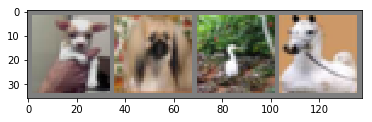

In [3]:
# Visualize some of the training images
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 2. Define a Convolution Neural Network

In [4]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [14]:
print(net)

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


### 3. Define a Loss function and optimizer
use a Classification Cross-Entropy loss and SGD with momentum

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Train the network
simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [16]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.250
[1,  4000] loss: 1.924
[1,  6000] loss: 1.676
[1,  8000] loss: 1.578
[1, 10000] loss: 1.509
[1, 12000] loss: 1.452
[2,  2000] loss: 1.400
[2,  4000] loss: 1.360
[2,  6000] loss: 1.354
[2,  8000] loss: 1.315
[2, 10000] loss: 1.297
[2, 12000] loss: 1.276
Finished Training


### 5. Test the network on the test data


### Convert to GPU

In [6]:
net.cuda()

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [8]:
print(net)

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [34]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        #inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.226
[1,  4000] loss: 1.230
[1,  6000] loss: 1.235
[1,  8000] loss: 1.214
[1, 10000] loss: 1.209
[1, 12000] loss: 1.197
[2,  2000] loss: 1.094
[2,  4000] loss: 1.129
[2,  6000] loss: 1.114
[2,  8000] loss: 1.120
[2, 10000] loss: 1.133
[2, 12000] loss: 1.130
[3,  2000] loss: 1.019
[3,  4000] loss: 1.053
[3,  6000] loss: 1.057
[3,  8000] loss: 1.075
[3, 10000] loss: 1.045
[3, 12000] loss: 1.036
[4,  2000] loss: 0.980
[4,  4000] loss: 0.994
[4,  6000] loss: 0.985
[4,  8000] loss: 1.011
[4, 10000] loss: 0.998
[4, 12000] loss: 0.979
[5,  2000] loss: 0.905
[5,  4000] loss: 0.948
[5,  6000] loss: 0.951
[5,  8000] loss: 0.947
[5, 10000] loss: 0.950
[5, 12000] loss: 0.966
[6,  2000] loss: 0.867
[6,  4000] loss: 0.890
[6,  6000] loss: 0.904
[6,  8000] loss: 0.924
[6, 10000] loss: 0.919
[6, 12000] loss: 0.923
[7,  2000] loss: 0.818
[7,  4000] loss: 0.853
[7,  6000] loss: 0.878
[7,  8000] loss: 0.869
[7, 10000] loss: 0.914
[7, 12000] loss: 0.892
[8,  2000] loss: 0.807
[8,  4000] 

### 5. Test the network on the test data
predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

GroundTruth:    cat  ship  ship plane


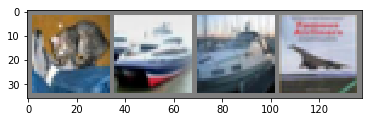

In [35]:
# Let us display an image from the test set to get familiar.
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
type(images), images.size()

(torch.FloatTensor, torch.Size([4, 3, 32, 32]))

In [36]:
# Compute the prediction form network
outputs = net(Variable(images).cuda())

In [15]:
type(outputs), outputs.size()

(torch.autograd.variable.Variable, torch.Size([4, 10]))

In [37]:
outputs.data



Columns 0 to 7 
 -1.1199  -2.2103   1.1881   3.1320   0.3193   3.0572  -2.1304   0.1060
 15.8749  16.4980  -0.7667  -9.7303  -4.4382 -10.7844  -9.3695 -11.2939
  5.9749   3.7084   0.1820  -3.4330  -2.3055  -3.9413  -3.5884  -5.7219
  5.8983  -0.0019   0.5829  -1.5846  -0.7568  -1.2322  -4.8892  -4.1563

Columns 8 to 9 
 -0.4396  -1.1279
 15.3455   8.2003
  7.3266   3.0314
  3.3563   1.6292
[torch.cuda.FloatTensor of size 4x10 (GPU 0)]

In [38]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j][0]]
                              for j in range(4)))

Predicted:    cat   car  ship plane


### Test the network performance (accuracy) on the whole dataset.

In [39]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images).cuda())
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


### Show which classes that performed well, and the classes that did not perform well:

In [40]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images).cuda())
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels.cuda()).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 85 %
Accuracy of  bird : 57 %
Accuracy of   cat : 44 %
Accuracy of  deer : 59 %
Accuracy of   dog : 43 %
Accuracy of  frog : 66 %
Accuracy of horse : 60 %
Accuracy of  ship : 73 %
Accuracy of truck : 53 %


In [41]:
list(0. for i in range(10))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [44]:
(predicted == labels.cuda()).squeeze()


 1
 1
 1
 1
[torch.cuda.ByteTensor of size 4 (GPU 0)]

In [46]:
list(label for label in labels)

[3, 5, 1, 7]